In [4]:
%pip install seaborn

     |████████████████████████████████| 285 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import sklearn

from sklearn import model_selection
from sklearn import preprocessing # to normalize the data and to convert non-numeric values to numeric values
#StandardScalre - Standardize features by removing the mean and scaling to unit variance
# LabelEncoder - converts each string value into a number
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# metrics implements functions assessing prediction error for specific purposes.
# includes score functions, performance metrics and pairwise metrics and distance computations.
from sklearn import metrics
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style
from collections import Counter
import seaborn as sns


# for computing
from scipy.stats import uniform, randint
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
complete_condo_data = pd.read_csv('Rental-Contracts-Non-Landed-Housing-Dev - removedNA.csv')
# complete_condo_data.head()
print(complete_condo_data.columns)

Index(['S/N', 'Building/Project Name', 'Street Name', 'Postal District',
       'Type', 'No. of Bedroom(for Non-Landed Only)', 'Monthly Gross Rent($)',
       'Floor Area (sq ft)', 'Lease Commencement Date'],
      dtype='object')


In [3]:
columns_to_drop = ['S/N', 'Type']
valid_condo_data = complete_condo_data.drop(columns = columns_to_drop)
valid_condo_data.head()

,Building/Project Name,Street Name,Postal District,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
0,EMERALD PARK,INDUS ROAD,3,2,3200,900 to 1000,Feb-21
1,V ON SHENTON,SHENTON WAY,1,1,3700,700 to 800,Feb-21
2,MARINA BAY RESIDENCES,MARINA BOULEVARD,1,2,5850,1100 to 1200,Feb-21
3,THE TRILINQ,JALAN LEMPENG,5,1,2250,500 to 600,Feb-21
4,PEOPLE'S PARK COMPLEX,PARK ROAD,1,1,1800,400 to 500,Feb-21


In [5]:
# Converting the non-numeric data to numeric
# In order to train the K-Nearest Neighbor Classifier we must convert any string data into some kind of a number.
#  sklearn has a method that can do this.

# Start by creating a label encoder object and then use
# that to encode each column of data into integers
le = preprocessing.LabelEncoder()

# The method fit_transform() takes a list (each of the columns) and will return an array containing new values.
building_name = le.fit_transform(list(valid_condo_data["Building/Project Name"]))
street_name = le.fit_transform(list(valid_condo_data["Street Name"]))
postal_district = le.fit_transform(list(valid_condo_data["Postal District"]))
# property_type = le.fit_transform(list(valid_condo_data["Type"]))
floor_area = le.fit_transform(list(valid_condo_data["Floor Area (sq ft)"]))
lease_date = le.fit_transform(list(valid_condo_data["Lease Commencement Date"]))
# num_of_bedrooms = le.fit_transform(list(valid_condo_data["No. of Bedroom(for Non-Landed Only)"]))
# monthly_rent = le.fit_transform(list(valid_condo_data["Monthly Gross Rent($)"]))
num_of_bedrooms = (list(valid_condo_data["No. of Bedroom(for Non-Landed Only)"]))
monthly_rent = (list(valid_condo_data["Monthly Gross Rent($)"]))

# print(property_type)
print(building_name)
print(street_name)
print(floor_area)
print(lease_date)
print(postal_district)
#print(num_of_bedrooms)
#print(monthly_rent)

valid_condo_data.head()

[ 482 1920  898 ...  251  209 1319]
[231 599 441 ... 726  77 586]
[27 25  1 ... 27 24 25]
[19 19 19 ... 35 35 35]
[ 2  0  0 ... 24 25 26]


,Building/Project Name,Street Name,Postal District,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
0,EMERALD PARK,INDUS ROAD,3,2,3200,900 to 1000,Feb-21
1,V ON SHENTON,SHENTON WAY,1,1,3700,700 to 800,Feb-21
2,MARINA BAY RESIDENCES,MARINA BOULEVARD,1,2,5850,1100 to 1200,Feb-21
3,THE TRILINQ,JALAN LEMPENG,5,1,2250,500 to 600,Feb-21
4,PEOPLE'S PARK COMPLEX,PARK ROAD,1,1,1800,400 to 500,Feb-21


In [9]:
predict = "Monthly Gross Rent($)"

# create a data set by excluding some of the columns
# This is the input data
# Recombine the data into a feature list and a label list
# features

# X = list(zip(property_type,building_name, street_name, floor_area, 
#              lease_date, postal_district, num_of_bedrooms, monthly_rent)) 

X = list(zip(building_name, street_name, floor_area, 
             lease_date, postal_district, num_of_bedrooms, monthly_rent)) 
# labels
y = list(monthly_rent)

In [10]:
# # One-hot encoding of categorical variables, using pandas get_dummies
# valid_condo_data_lr = valid_condo_data.copy()
# valid_condo_data_lr = pd.get_dummies(valid_condo_data_lr, columns = ['Building/Project Name'], drop_first = True)
# valid_condo_data_lr = pd.get_dummies(valid_condo_data_lr, columns = ['Street Name'], drop_first = True)
# valid_condo_data_lr = pd.get_dummies(valid_condo_data_lr, columns = ['Floor Area (sq ft)'], drop_first = True)
# valid_condo_data_lr.head()

In [11]:
# # Separate dependent(target or label) variable and independent (features) variables
# # The target, also known as the label, is the value we want to predict and
# # the features are all the columns the model uses to make a prediction. 
# target = 'Monthly Gross Rent($)'
# X = valid_condo_data_lr.drop([target], axis = 1) # features
# # Saving feature / cloumn names for later use
# X_list = list(X.columns)
# y = valid_condo_data_lr[target] # label
# # print(X_list)
# # print(y)

In [12]:
# Finally we will split our data into training and testing data using the same process seen previously.
# Perform train test split - Splits data into training and testing sets.
# During training, let the model ‘see’ the answers, in this case the rent, so it can learn how to predict the rent from the features.
# Expecting that there is some relationship between all the features and the target value, 
# and the model’s job is to learn this relationship during training.
# Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


In [13]:
# X_train_original = X_train.copy()
# X_test_original = X_test.copy()

# # Carry out standardization on numerical columns
# num_of_bedrooms = 'No. of Bedroom(for Non-Landed Only)'
# postal_district = 'Postal District'
# monthly_rent = 'Monthly Gross Rent($)'
# scaler = StandardScaler() 
# numerical_cols = [num_of_bedrooms, postal_district]
# # X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# # X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

In [14]:
# X_train.head()

In [15]:


# """
# # How to save a better version of model?
# # Continue to keep save a model, by using a loop
# # File generation needs to be done only once.
#         # Once this is generated the above linear model and file saving can be deleted
# best_accuracy = 0
# for _ in range(30):
#     # separate data into train and test data
#     X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

#     # print(X_train, 'X_train')    # print( X_test, 'X_test')    # print(y_train, 'y_train')    # print(y_test, 'y_test')

#     linear = linear_model.LinearRegression()
#     linear.fit(X_train, y_train)
#     accuracy = linear.score(X_test, y_test)
#     print('Accuracy', accuracy)
    
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         # Save the model using pickle
#         # File generation needs to be done only once.
#         # Once this is generated the above linear model and file saving can be deleted
#         with open("RentModel.pickle", "wb") as f:
#             pickle.dump(linear, f)
# """
    
# # Read the pickle file
# pickle_in = open("RentModel.pickle", "rb")
# # load that read model into linear model
# linear = pickle.load(pickle_in)

# print('Coefficient: ', linear.coef_)
# print('Intercept: ', linear.intercept_)

# predictions = linear.predict(X_test)

# print('prediction', '\t', '\t','X_test', '\t', '\t','y_test' )
# for index in range(len(predictions)):
#     print('--------------------------------------------------------------------------------------------------')
#     print(predictions[index], '\t',  X_test[index], '\t', y_test[index])

# # for index in range(len(predictions)):
# #     print('--------------------------------------------------------------------------------------------------')
# #     print('prediction: ', predictions[index] )
# #     print( 'X_test[Postal District]: ', X_test.iloc[index]['Postal District'])
# #     print( 'X_test[No. of Bedroom]: ', X_test.iloc[index]['No. of Bedroom(for Non-Landed Only)'])
# #     print( 'X_test[Monthly Gross Rent($)]: ', X_test.iloc[index]['Monthly Gross Rent($)'])
# #     print( 'y_test', y_test.iloc[index])





In [21]:
# Instantiate a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)


In [22]:
# # Plotting
# #p = "No. of Bedroom(for Non-Landed Only)"
# p = "Postal District"
# style.use("ggplot")
# # Set up a scatter plot
# pyplot.scatter(df[p], df["Monthly Gross Rent($)"])
# pyplot.xlabel(p)
# pyplot.ylabel('Monthly Gross Rent($)')
# pyplot.show()

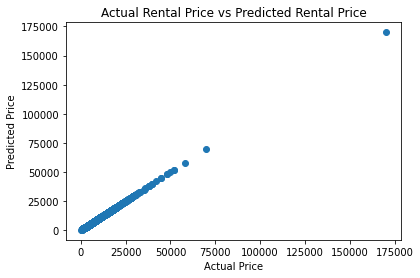

In [23]:
# Visualizing actual prices vs predicted values
pyplot.scatter(y_train, y_pred_train)
pyplot.xlabel("Actual Price")
pyplot.ylabel("Predicted Price")
pyplot.title("Actual Rental Price vs Predicted Rental Price")
pyplot.show()

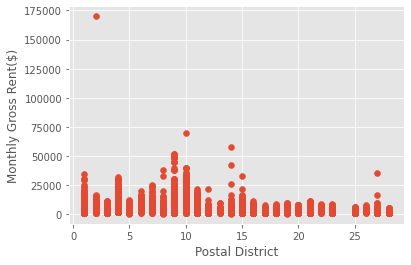

In [24]:
# Plotting
#p = "No. of Bedroom(for Non-Landed Only)"
p = "Postal District"
style.use("ggplot")
# Set up a scatter plot
pyplot.scatter(valid_condo_data[p], valid_condo_data["Monthly Gross Rent($)"])
pyplot.xlabel(p)
pyplot.ylabel('Monthly Gross Rent($)')
pyplot.show()

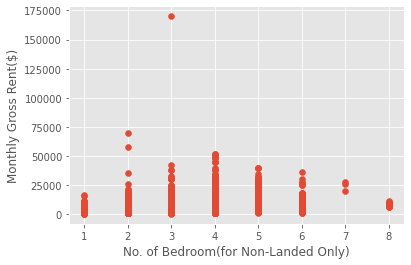

In [25]:
# Plotting
p = "No. of Bedroom(for Non-Landed Only)"
style.use("ggplot")
# Set up a scatter plot
pyplot.scatter(valid_condo_data[p], valid_condo_data["Monthly Gross Rent($)"])
pyplot.xlabel(p)
pyplot.ylabel('Monthly Gross Rent($)')
pyplot.show()

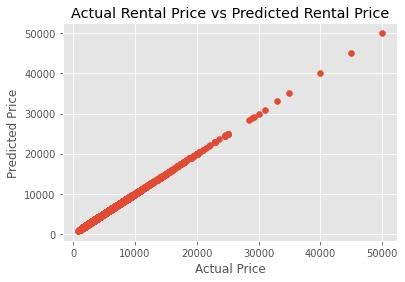

In [27]:
# Visualizing actual prices vs predicted values
pyplot.scatter(y_test, y_pred_test)
pyplot.xlabel("Actual Price")
pyplot.ylabel("Predicted Price")
pyplot.title("Actual Rental Price vs Predicted Rental Price")
pyplot.show()